In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import cv2
import os

In [29]:
img = image.load_img('training_/Apple 5/r0_0.jpg')

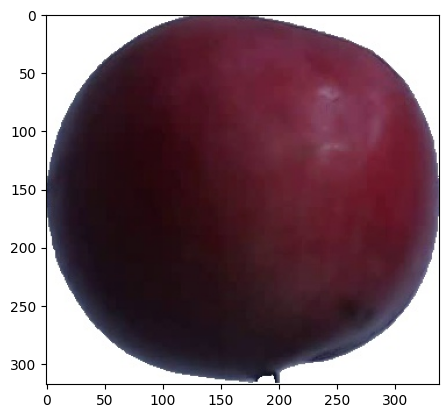

In [30]:
plt.imshow(img)

In [31]:
cv2.imread('training_/Apple 5/r0_0.jpg').shape

(318, 338, 3)

In [32]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [33]:
train_data = train.flow_from_directory('training_',target_size=(200,200),batch_size=3,class_mode='binary')

Found 594 images belonging to 2 classes.


In [34]:
val_data = validation.flow_from_directory('validation_',target_size=(200,200),batch_size=3,class_mode='binary')

Found 296 images belonging to 2 classes.


In [35]:
train_data.class_indices

{'Apple 5': 0, 'Blackberrie half rippen 1': 1}

In [36]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [39]:
model_fit = model.fit(train_data,
                      steps_per_epoch=3,
                      epochs=10,
                      validation_data=val_data)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 883ms/step - accuracy: 0.7639 - loss: 0.7299 - val_accuracy: 0.7905 - val_loss: 0.4061
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 890ms/step - accuracy: 0.8194 - loss: 0.1685 - val_accuracy: 0.5068 - val_loss: 2.1472
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 893ms/step - accuracy: 0.3472 - loss: 2.5880 - val_accuracy: 0.5068 - val_loss: 0.5068
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 888ms/step - accuracy: 0.6389 - loss: 0.4712 - val_accuracy: 1.0000 - val_loss: 0.3359
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 911ms/step - accuracy: 1.0000 - loss: 0.3587 - val_accuracy: 1.0000 - val_loss: 0.2503
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 986ms/step - accuracy: 1.0000 - loss: 0.2742 - val_accuracy: 1.0000 - val_loss: 0.1410
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 906ms/step - accuracy: 1.0000 - loss: 0.0993 - val_accuracy: 1.0000 - val_loss: 0.0438
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 910ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss:

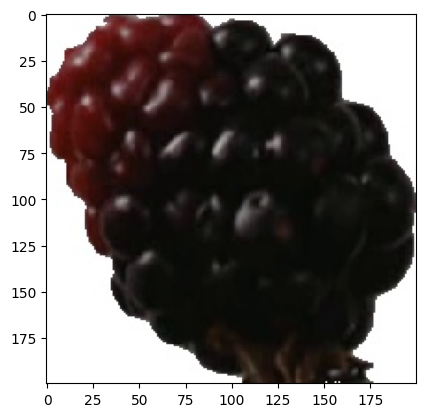

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
The fruit is Blackberry


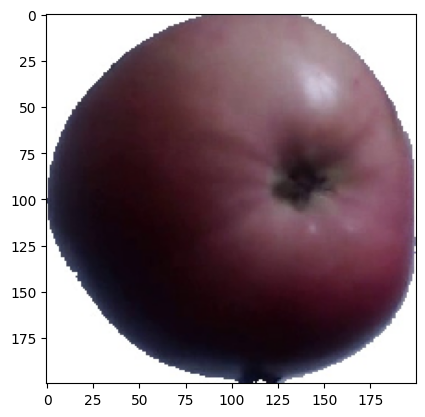

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The fruit is apple


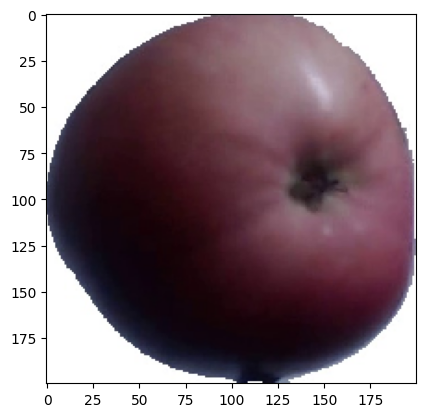

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The fruit is apple


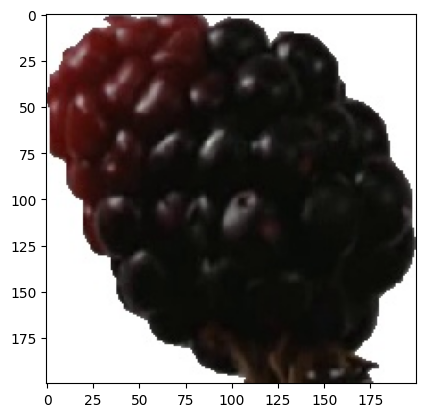

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The fruit is Blackberry


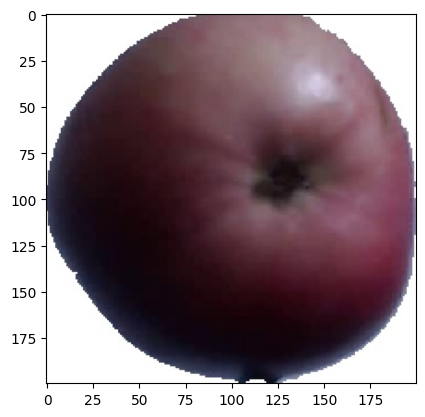

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The fruit is apple


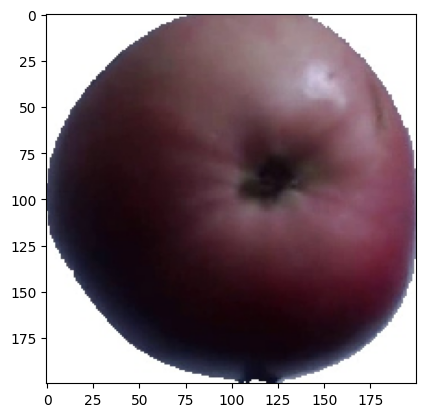

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The fruit is apple


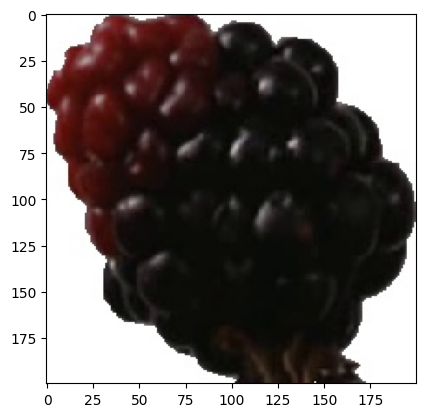

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The fruit is Blackberry


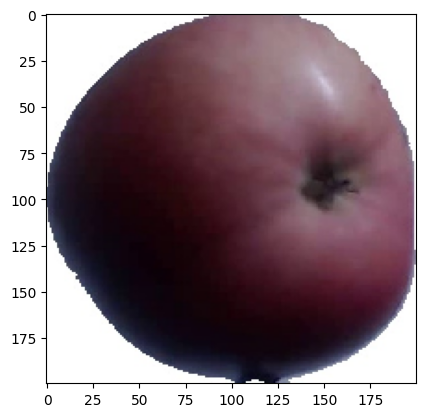

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The fruit is apple


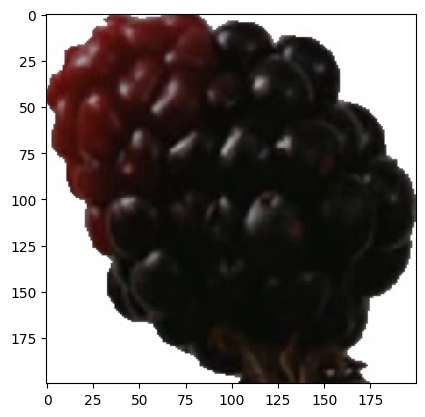

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The fruit is Blackberry


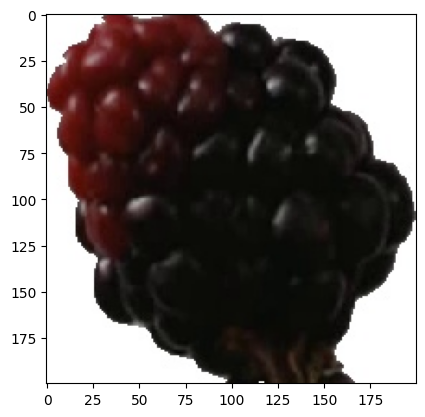

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The fruit is Blackberry


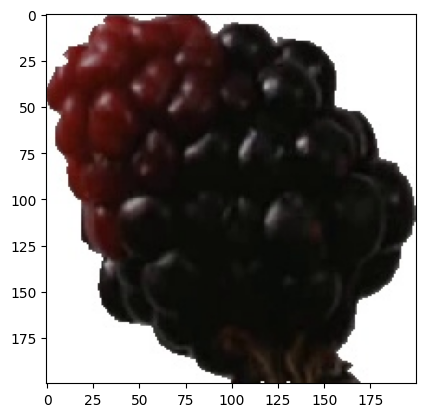

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The fruit is Blackberry


In [42]:
test_path = 'test_/test'
for i in os.listdir(test_path):
    img = image.load_img(test_path + '/' + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    
    res = "apple" if model.predict(images) == 0 else "Blackberry"
    print(f"The fruit is {res}")